In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import numpy as np
from word2number import w2n

In [5]:
df = pd.read_csv("Cleaned_with_SQL.csv")

In [6]:
df.head(15)

,PatientID,Name,Age,Gender,Diagnosis,Medication,AdmissionDate,DischargeDate,Doctor,Department,Status
0,2001,John Doe,45,Male,Hypertension,Med A,2025-10-01,2025-10-15,Dr. Smith,Cardiology,admitted
1,2002,Jane Smith,forty-five,Female,Diabetes,Med B,2025-01-10,2025-01-15,Dr. Lee,Endocrinology,admitted
2,2003,Bob Brown,55,Male,Asthma,Med C,2025-01-10,2025-01-15,Dr. Carter,Pulmonology,under observation
3,2004,unknown,30,Female,Flu,Med D,2025-05-02,2025-05-10,unknown,General Medicine,discharged
4,2005,Tom Wilson,62,Male,Heart Disease,Med E,2025-01-03,2025-01-10,Dr. Johnson,Cardiology,discharged
5,2006,Susan Clark,49,Female,Kidney Disease,Med F,2025-12-04,2025-12-17,Dr. Patel,Nephrology,admitted
6,2007,David Jones,37,Male,Pneumonia,Med G,2025-05-20,2025-05-25,Dr. Martinez,Pulmonology,admitted
7,2008,Nancy Miller,28,Female,Flu,Med D,2025-06-15,2025-06-20,Dr. Smith,General Medicine,under observation
8,2009,Michael Scott,40,Male,Hypertension,Med A,2025-07-01,2025-07-07,Dr. Smith,Cardiology,admitted
9,2010,Pam Beesly,34,Female,Diabetes,Med B,2025-08-10,2025-08-15,Dr. Lee,Endocrinology,discharged


In [7]:
print(df.dtypes)

PatientID         int64
Name             object
Age              object
Gender           object
Diagnosis        object
Medication       object
AdmissionDate    object
DischargeDate    object
Doctor           object
Department       object
Status           object
dtype: object


In [8]:
df[["Name","Gender","Diagnosis","Medication","Doctor","Department","Status"]]=df[["Name","Gender","Diagnosis","Medication","Doctor","Department","Status"]].astype("string")

In [9]:
print(df.dtypes)

PatientID                 int64
Name             string[python]
Age                      object
Gender           string[python]
Diagnosis        string[python]
Medication       string[python]
AdmissionDate            object
DischargeDate            object
Doctor           string[python]
Department       string[python]
Status           string[python]
dtype: object


In [10]:
def convert_to_int(value):
    try:
       
        if isinstance(value, str) and value.replace(" ", "").isnumeric():  
            return int(value)
        return w2n.word_to_num(value) 
    except ValueError:  
        return None  
    
copppy=df.copy() 
 

In [11]:
df["Age"] = df["Age"].apply(convert_to_int)

In [12]:
df['AdmissionDate']=pd.to_datetime(df['AdmissionDate'])
df['DischargeDate']=pd.to_datetime(df['DischargeDate'])

In [13]:
print(df.dtypes)

PatientID                 int64
Name             string[python]
Age                       int64
Gender           string[python]
Diagnosis        string[python]
Medication       string[python]
AdmissionDate    datetime64[ns]
DischargeDate    datetime64[ns]
Doctor           string[python]
Department       string[python]
Status           string[python]
dtype: object


In [14]:
df["Name"] = df["Name"].str.strip()
df["Gender"] = df["Gender"].str.strip()
df["Diagnosis"] = df["Diagnosis"].str.strip()
df["Medication"] = df["Medication"].str.strip()
df["Doctor"] = df["Doctor"].str.strip()
df["Department"] = df["Department"].str.strip()
df["Status"] = df["Status"].str.strip()



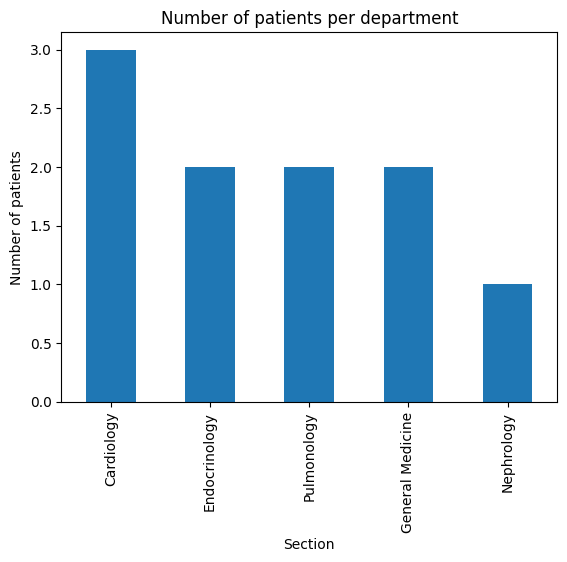

In [15]:
department_counts = df['Department'].value_counts()
department_counts.plot(kind='bar', title='Number of patients per department')
plt.xlabel('Section')
plt.ylabel('Number of patients')
plt.show()

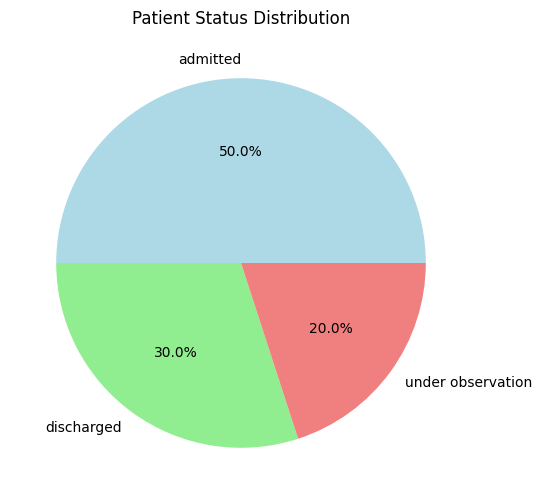

In [16]:
status_counts = df["Status"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title("Patient Status Distribution")
plt.show()

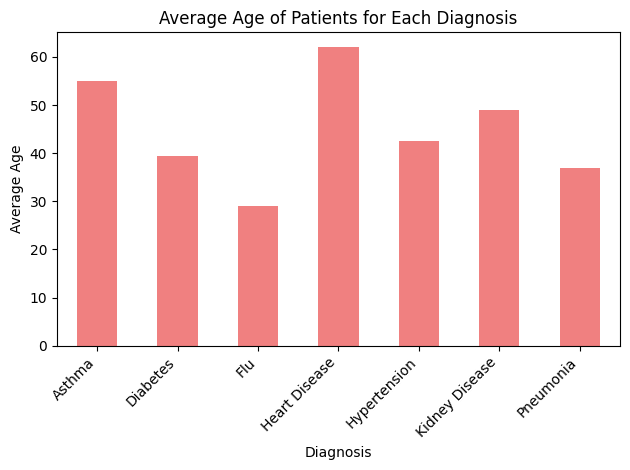

In [17]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
avg_age_per_diagnosis = df.groupby('Diagnosis')['Age'].mean()



avg_age_per_diagnosis.plot(kind='bar', color='lightcoral')
plt.title('Average Age of Patients for Each Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

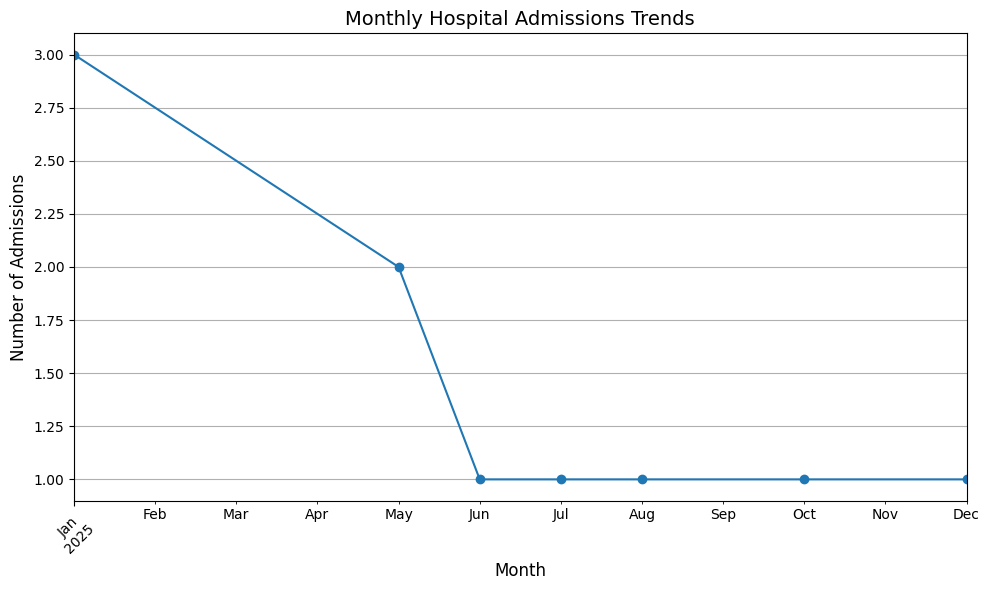

In [ ]:
df['Month'] = df['AdmissionDate'].dt.to_period('M')  
monthly_admissions = df.groupby('Month').size()

plt.figure(figsize=(10, 6))
monthly_admissions.plot(kind='line', marker='o')
plt.title('Monthly Hospital Admissions Trends', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Admissions', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [21]:
df

,PatientID,Name,Age,Gender,Diagnosis,Medication,AdmissionDate,DischargeDate,Doctor,Department,Status,Month
0,2001,John Doe,45,Male,Hypertension,Med A,2025-10-01,2025-10-15,Dr. Smith,Cardiology,admitted,2025-10
1,2002,Jane Smith,45,Female,Diabetes,Med B,2025-01-10,2025-01-15,Dr. Lee,Endocrinology,admitted,2025-01
2,2003,Bob Brown,55,Male,Asthma,Med C,2025-01-10,2025-01-15,Dr. Carter,Pulmonology,under observation,2025-01
3,2004,unknown,30,Female,Flu,Med D,2025-05-02,2025-05-10,unknown,General Medicine,discharged,2025-05
4,2005,Tom Wilson,62,Male,Heart Disease,Med E,2025-01-03,2025-01-10,Dr. Johnson,Cardiology,discharged,2025-01
5,2006,Susan Clark,49,Female,Kidney Disease,Med F,2025-12-04,2025-12-17,Dr. Patel,Nephrology,admitted,2025-12
6,2007,David Jones,37,Male,Pneumonia,Med G,2025-05-20,2025-05-25,Dr. Martinez,Pulmonology,admitted,2025-05
7,2008,Nancy Miller,28,Female,Flu,Med D,2025-06-15,2025-06-20,Dr. Smith,General Medicine,under observation,2025-06
8,2009,Michael Scott,40,Male,Hypertension,Med A,2025-07-01,2025-07-07,Dr. Smith,Cardiology,admitted,2025-07
9,2010,Pam Beesly,34,Female,Diabetes,Med B,2025-08-10,2025-08-15,Dr. Lee,Endocrinology,discharged,2025-08


In [22]:
df.to_csv("Cleaned_For_Queries.csv")